## CIS242 Homework #7 (Due Mar 24, 10pm)

Remember to make a copy of this notebook before you start to work, and rename the notebook to be **"CIS242_Spring2023_Homework#_Name"**.

Rule #1: please finish all required problems first and then optional bonus problems that you finish all in one notebook. Then share the notebook with anyone with link, and **submit the link to Canvas** for me to grade.

Rule #2: **please finish all coding work by yourself as much as you can**. Since exams are real-time coding, overly seeking help from others may risk underdeveloping your independent coding skills and thus underperformance in exams.

Rule #3: **For any function that you write, it should have proper docstrings to explain what your function does, what are acceptable inputs for each argument, and what is the returning value of the function**.

===========================================

In [ ]:
import numpy as np
import numpy.random as rand
import seaborn as sns
import scipy.stats as stats
import random
import pandas as pd

**Question 1:** we see that the Central Limit Theorem claims that an i.i.d. sample mean $\bar{x}$ of size $n$ would converge to a normal distribution $N(\mu, \sigma^2/n)$ where $\mu$ and $\sigma^2$ are the population mean and variance, respectively.

Your task is to verify this by creating two figures.

Step I: select a population distribution that you draw sample from. It can be any **non-normal** distribution, such as a binomial, Poisson, chi-square, or any other commonly used distribution with parameters selected by you.

Step II: Compute the mean and variance of $\bar{x}$ for a variety of $n$ values ranging from 1 to 10,000. You should have at least ten different $n$ values.

Step III: create a graph of $\mu_{\bar{x}}$ vs $\mu$, and another graph of $\sigma^2_{\bar{x}}$ vs $\sigma^2/n$. Explain what you observe and relate that to the Central Limit Theorem.

Step I: I will chooose a binomial distribution.

In [ ]:
n = 10000
p = 0.5
tru_mu = n*p
tru_var = n*p*(1-p)

# sample_sizes = random.choices(range(100), k=1) + random.choices(range(100, 1000), k=2) + random.choices(range(1000,10000), k=6) + [5000]
# num_experiments = random.choices(range(100), k=1) + random.choices(range(100, 1000), k=2) + random.choices(range(1000,10000), k=6) + [5000]
sample_sizes = [10, 100, 500, 800, 1000, 3000, 5000, 8000, 9000, 10000]
num_experiments = [10, 100, 500, 800, 1000, 3000, 5000, 8000, 9000, 10000]
sorted(sample_sizes, reverse=True)
sorted(num_experiments, reverse=True)

means = []
stds = []

results = dict()

for sample_size in sample_sizes:
  results[sample_size] = dict()
  results[sample_size]['mean_of_all_exp'] = []
  results[sample_size]['std_of_all_exp_mean'] = []

  for experiment in num_experiments:
    results[sample_size][experiment] = dict()
    exp_mean = [None] * experiment

    for i in range(experiment):
      binom_x = rand.binomial(n, p, size = sample_size)
      x_mean = np.mean(binom_x)
      exp_mean[i] = x_mean

    results[sample_size][experiment]['mean'] = np.mean(exp_mean)
    results[sample_size][experiment]['std_of_mean'] = np.std(exp_mean)

    results[sample_size]['mean_of_all_exp'].append(np.mean(exp_mean))
    results[sample_size]['std_of_all_exp_mean'].append(np.std(exp_mean))
  
  results[sample_size]['mean_of_all_exp_mean'] = np.mean(results.get(sample_size).get('mean_of_all_exp', 0))
  results[sample_size]['std_of_mean_of_all_exp_mean'] = np.std(results.get(sample_size).get('mean_of_all_exp', 0))

print(results)

{10: {'mean_of_all_exp': [4994.71, 4999.375000000001, 5000.547799999999, 5000.093375, 5000.2476, 5000.2828, 4999.83366, 5000.085325, 4999.858788888889, 4999.72824], 'std_of_all_exp_mean': [16.623323975667354, 13.992564990022386, 15.227721272731532, 15.488430153161902, 16.184432465798736, 15.75070001068735, 15.699782196081573, 15.596248736294733, 15.818362061572232, 15.886872269342382], 10: {'mean': 4994.71, 'std_of_mean': 16.623323975667354}, 100: {'mean': 4999.375000000001, 'std_of_mean': 13.992564990022386}, 500: {'mean': 5000.547799999999, 'std_of_mean': 15.227721272731532}, 800: {'mean': 5000.093375, 'std_of_mean': 15.488430153161902}, 1000: {'mean': 5000.2476, 'std_of_mean': 16.184432465798736}, 3000: {'mean': 5000.2828, 'std_of_mean': 15.75070001068735}, 5000: {'mean': 4999.83366, 'std_of_mean': 15.699782196081573}, 8000: {'mean': 5000.085325, 'std_of_mean': 15.596248736294733}, 9000: {'mean': 4999.858788888889, 'std_of_mean': 15.818362061572232}, 10000: {'mean': 4999.72824, 'std

In [ ]:
df = pd.DataFrame()
sorted(sample_sizes, reverse=True)
df_means = []
df_std_of_means = []
df_var = []
df_exp = []
df_sample_size = []
actual_var = []

for sample_size in sample_sizes: 
  for experiment in num_experiments:
    df_sample_size.append(sample_size)
    df_exp.append(experiment)
    df_means.append(results[sample_size][experiment]['mean'])
    df_std_of_means.append(results[sample_size][experiment]['std_of_mean'])
    df_var.append(results[sample_size][experiment]['std_of_mean'] ** 2)
    actual_var.append(tru_var/sample_size)


df['mean'] = df_means
df['std_of_means'] = df_std_of_means
df['var'] = df_var
df['exp'] = df_exp
df['sample_size'] = df_sample_size
df['actual_var'] = actual_var
df

,mean,std_of_means,var,exp,sample_size,actual_var
0,4994.710000,16.623324,276.334900,10,10,250.00
1,4999.375000,13.992565,195.791875,100,10,250.00
2,5000.547800,15.227721,231.883495,500,10,250.00
3,5000.093375,15.488430,239.891469,800,10,250.00
4,5000.247600,16.184432,261.935854,1000,10,250.00
...,...,...,...,...,...,...
95,5000.004725,0.498482,0.248485,3000,10000,0.25
96,5000.010293,0.497152,0.247160,5000,10000,0.25
97,4999.997086,0.495251,0.245274,8000,10000,0.25
98,4999.998613,0.506635,0.256679,9000,10000,0.25


In [ ]:
print(tru_mu, tru_var)
df.describe()

5000.0 2500.0


,mean,std_of_means,var,exp,sample_size,actual_var
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4999.961637,2.937683,28.193796,3741.000000,3741.000000,28.779861
std,0.598158,4.445383,73.122947,3773.234954,3773.234954,74.457223
min,4994.710000,0.482125,0.232445,10.000000,10.000000,0.250000
25%,4999.974431,0.564407,0.318556,500.000000,500.000000,0.312500
50%,4999.996002,1.139066,1.303394,2000.000000,2000.000000,1.666667
75%,5000.014325,2.239920,5.017324,8000.000000,8000.000000,5.000000
max,5002.005000,16.623324,276.334900,10000.000000,10000.000000,250.000000


<Axes: xlabel='sample_size', ylabel='mean'>

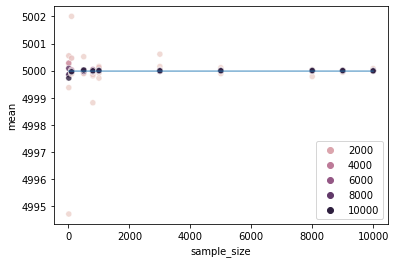

In [ ]:
sns.scatterplot(x=df["sample_size"], y=df["mean"], hue=df["exp"], alpha =0.8)
sns.lineplot(x=df["sample_size"], y= [tru_mu] * len(df['sample_size']), alpha = 0.5)

<Axes: xlabel='sample_size', ylabel='var'>

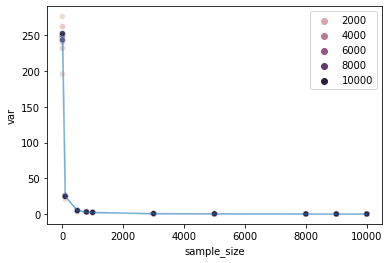

In [ ]:
sns.scatterplot(x=df["sample_size"], y=df["var"], hue=df["exp"], alpha=0.8)
sns.lineplot(x=df["sample_size"], y= df['actual_var'], alpha=0.5)

**Question 2**: Study the code in my lecture slide that counts how frequent the true population mean lies within the estimated CI. Write a function `CI_simulation(population_data, sample_size, exp_num, alpha)`:

- `population_data`: The population data that we may draw samples from

- `sample_size`: the sample size $n$

- `exp_num`: The number of experiments that we draw a sample size of $n$

- `alpha`: the significance level. $1-\alpha$ is the confidence level of our estimate

The function should print out a message as below by running Monte Carlo Simulations:

`The proportion of population mean within the <90.0%> estimated interval with a sample size of <20> is <0.8932>.`

Here the numbers <90.0%>, <20>, <0.8932> are only examples  and they should be from the values of input arguments or your simulation results. You should run t-tests and do not assume known $\sigma$. 

In [ ]:
def CI_simulation(population_data, sample_size: int, exp_num: int, alpha: float):
  """
  Calculates frequency that true population mean lies within estimated CI.
  We use t-tests and do not assume known σ.

  Parameters
  ----------
  population_data: Sequence
  sample_size: int
    The sample size. Must be greater than 0.
  exp_num: int
      Number of experiments to run. Must be greater than 0.
  alpha: float
      Float between 0 and 1. 

  Returns
  -------
  result: float
    Proportion of population mean within the CI. 

  Raises
  -------
  TypeError
      If sample_size is not int or exp_num is not int or alpha is not float.
      If sample_size <= 0 or exp_num <= 0 or alpha >1 or alpha <0.
  """

  if not isinstance(sample_size, int) or sample_size <= 0: 
    raise TypeError

  if not isinstance(exp_num, int) or exp_num <= 0: 
    raise TypeError

  if not isinstance(alpha, float) or alpha > 1.0 or alpha < 0.0:
    raise TypeError

  count = 0 
  mu = np.mean(population_data)
  for experiment in range(exp_num):
    sample_data = random.choices(population_data, k=sample_size)
    data_mean = np.mean(sample_data)
    data_std = np.std(sample_data)
    lower, upper = stats.t.interval(1-alpha, sample_size-1, data_mean, data_std/np.sqrt(sample_size))
    if (lower <= mu <= upper):
      count += 1

  print(f"The proportion of population mean within the {(1-alpha):%} estimated interval with a sample size of {sample_size} is {count/sample_size}.")
  return count/sample_size

In [ ]:
test_pop = (rand.normal(0, 1, 10000) + rand.uniform(0, 2, 10000)) * rand.chisquare(1, 10000)
CI_simulation(test_pop, sample_size =10000, exp_num= 10000, alpha = 0.05)

The proportion of population mean within the 95.000000% estimated interval with a sample size of 10000 is 0.951.


0.951

# Teacher Comments

Ex1: for the variance plot, it is better to use log scale in y. 

Good job.
